## ZIRADDIN KAZIMLI 

# U.S. Medical Insurance Costs

You work as a data scientist for an insurance company and need to provide your boss some clarity on which factors affect people's charges or insurance costs. Your analysis is key to infrom strategical business and clinical decisions.

## Instructions

1) Create folder in which you create your jupyter notebook

2) Name your folder AI683_Fall2023_FIRSTNAME_LASTNAME

2) Place in that folder the .csv dataset you can find on brightspace

3) Perform the guided small project by following the instrcutions in each cells. make sure to keep the cell structure displaying results for each tasks.

4) Upon Completion, Upload the ENTIRE FOLDER ('.csv' + Jupyter Notebook) to brightspace in the assignement section


## Debugging Tips

Feeling stuck? Try the following:

1) Google your question: oftentimes, someone has had the same question as you! Check out websites like StackOverflow, Dev.to, Statology or https://www.geeksforgeeks.org/ to see how other folks have found solutions.

2) Read the documentation: make sure to carefully read through the documentation for any libraries that you are using. Oftentimes they’ll have examples of what you’re looking for!

In [111]:
# Load Librairies
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as sms
import statsmodels.graphics.gofplots as smg
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mpl_toolkits.mplot3d import Axes3D

from patsy import dmatrices

In [48]:
# 2) Load the all the data from insurance.csv in a datafram named df
df = pd.read_csv('insurance.csv')

### Exploratory Analysis

In [49]:
# Perfom Exploratory Data Analysis
#Print the summary information of the dataframe using the describe method
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [50]:
#Print the head of the dataframe to get a visual of your data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
# Find out the average age of the patients in the dataset.
df['age'].mean()

39.20702541106129

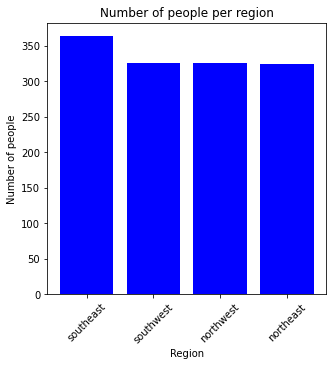

In [52]:
# Analyze where a majority of the individuals are from. Use the data visualization of your choise to 
# show the number of people per region
region_counts = df['region'].value_counts()
plt.figure(figsize = (5, 5))
plt.bar(region_counts.index, region_counts.values, color = 'blue')
plt.title('Number of people per region')
plt.xlabel('Region')
plt.ylabel('Number of people') 
plt.xticks(rotation = 45) # Rotate x-axis labels for better readability
plt.show()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


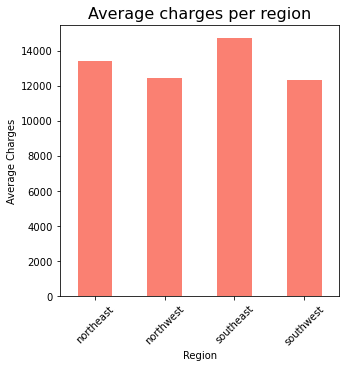

In [53]:
# Compute the average charges per region. tip: use groupby method
average_charges_by_region = df.groupby('region')['charges'].mean()
plt.figure(figsize=(5,5))
average_charges_by_region.plot(kind = 'bar', color = 'salmon')
print(average_charges_by_region)
plt.title("Average charges per region", fontsize = 16)
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.xticks(rotation=45)
plt.show()

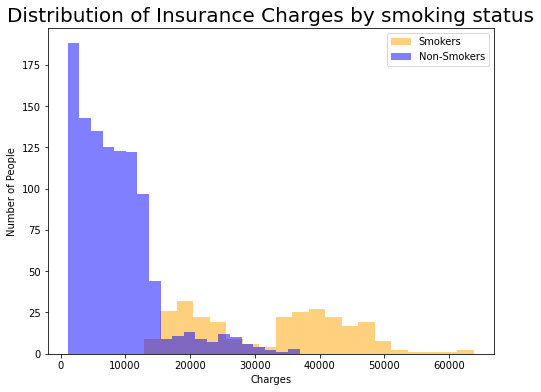

In [54]:
# plot distribution of Insurance Charges by smoking status 
# Tip use groupby method for pandas dataframe
# You will visually notice the difference in distribution shape based on wether the patient smoke or not
# this tickles your curiosity and decide to further explore this direction
plt.figure(figsize = (8,6))
smokers = df[df['smoker']== 'yes']
non_smokers = df[df['smoker'] == 'no']

plt.hist(smokers['charges'], bins = 20, alpha = 0.5, label = 'Smokers', color = 'orange')
plt.hist(non_smokers['charges'], bins = 20, alpha = 0.5, label = 'Non-Smokers', color = 'blue')

plt.title('Distribution of Insurance Charges by smoking status', fontsize = 20)
plt.xlabel('Charges')
plt.ylabel('Number of People')
plt.legend()
plt.show()

### Correlation

The following part of the project will be focused on assessing wich of the input variables {age,bmi,children} affect the predictor variable {charges}.

In [55]:
# Compute the correlation matrix for the dataset
correlation_matrix = df[['age', 'bmi', 'children', 'charges']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


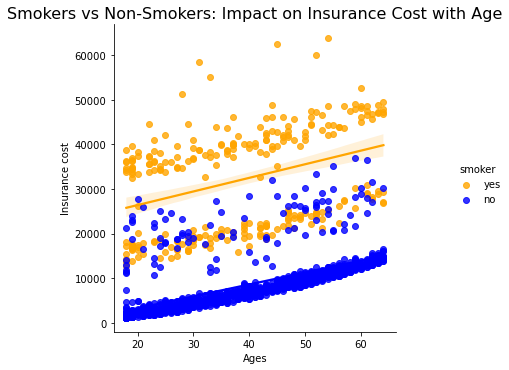

In [56]:
# Visually exploring the impact of smoking...there seems to be something interesting here! Let's dig deeper!

sns.lmplot(x="age", y="charges", hue="smoker", data = df,palette={"yes": "orange", "no": "blue"})
plt.title('Smokers vs Non-Smokers: Impact on Insurance Cost with Age', fontsize = 16)
plt.xlabel('Ages')
plt.ylabel('Insurance cost')
plt.show()

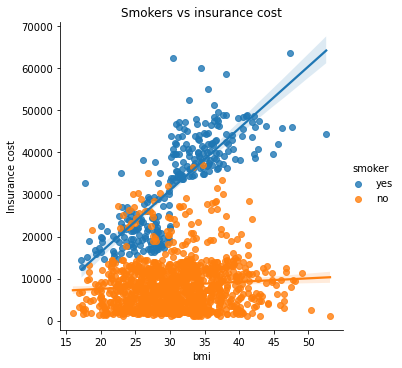

In [57]:
# Visually exploring the impact of smoking...there seems to be something interesting here! Let's dig deeper!

sns.lmplot(x="bmi", y="charges", hue="smoker", data = df, palette={"yes": "orange", "no": "blue")
plt.title('Smokers vs insurance cost')
plt.xlabel('bmi')
plt.ylabel('Insurance cost')
plt.show()

In [59]:
# Compute the correlation matrix for the dataset only for smokers
correlation_matrix = df[df['smoker'] == 'yes'].corr()
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.059674  0.081183  0.368224
bmi       0.059674  1.000000 -0.012619  0.806481
children  0.081183 -0.012619  1.000000  0.035945
charges   0.368224  0.806481  0.035945  1.000000


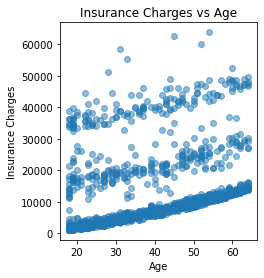

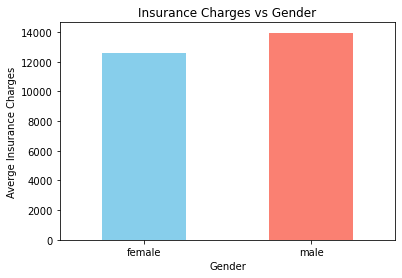

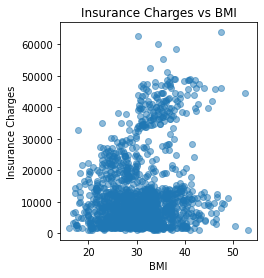

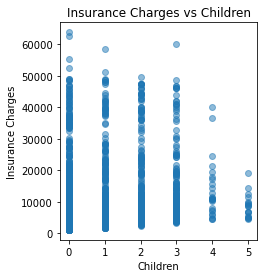

In [83]:
# Plot relationship of charges to each variable

#relationship of charges for Age variable
plt.figure(figsize = (12, 4))
plt.subplot(131)
plt.scatter(df['age'], df['charges'], alpha = 0.5)
plt.title("Insurance Charges vs Age")
plt.xlabel('Age')
plt.ylabel('Insurance Charges')

# #relationship of charges for Sex variable
# plt.figure(figsize = (12, 4))
# plt.subplot(131)
# plt.scatter(df['sex'], df['charges'], alpha = 0.5)
# plt.title('Charges vs Sex')
# plt.xlabel('Sex')
# plt.ylabel('Charges')

# #relationship of charges for Sex variable
plt.figure(figsize=(6, 4))
df.groupby('sex')['charges'].mean().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Insurance Charges vs Gender')
plt.xlabel('Gender')
plt.ylabel('Averge Insurance Charges')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

#relationship of charges for BMI variable
plt.figure(figsize = (12, 4))
plt.subplot(132)
plt.scatter(df['bmi'], df['charges'], alpha = 0.5)
plt.title("Insurance Charges vs BMI")
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')

#relationship of charges for children variable
plt.figure(figsize = (12, 4))
plt.subplot(133)
plt.scatter(df['children'], df['charges'], alpha = 0.5)
plt.title("Insurance Charges vs Children")
plt.xlabel('Children')
plt.ylabel('Insurance Charges')


plt.show()


In [84]:
# Generates the linear regression model with Y={charges} and X1,2,3= {age,bmi,children}
X = df[['age', 'bmi', 'children']]
Y = df['charges']
# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           8.80e-37
Time:                        20:03:41   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.0

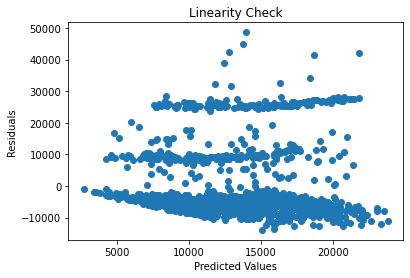

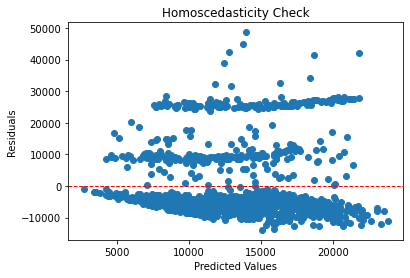

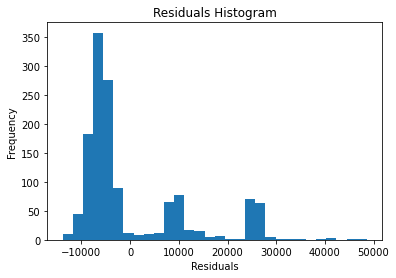

In [90]:
# Next we need to check that the assumption of linearity, Homoscedasticity and normality are respected.

#Linearity Assumption:
# Create a scatterplot of predicted values vs. residuals
plt.scatter(model.predict(), model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check')
plt.show()

#Homoscedasticity Assumption:
# Create a scatterplot of residuals vs. predicted values
plt.scatter(model.predict(), model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
plt.show()


#Normality Assumption:
# Create a histogram of residuals
plt.hist(model.resid, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram')
plt.show()


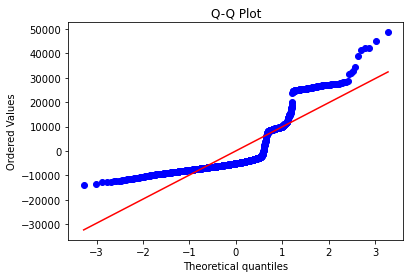

In [91]:
# Lastly check for normality with the QQ plot
# Create a Q-Q plot of residuals
st.probplot(model.resid, dist='norm', plot=plt)
plt.title('Q-Q Plot')
plt.show()


In [97]:
# All 3 assumptions are valid, lets keep moving and check for multicolinearity
# Calculate the VIF for each X_i
# Define the independent variables (X) and the dependent variable (Y)
X = df[['age', 'bmi',  'children', 'charges']]

# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print("VIF for each independent variable:")
print(vif)


"""For non-numeric data, such as categorical variables, calculating VIF in the same way is 
not meaningful because the concept of multicollinearity as it relates to VIF doesn't apply. """

VIF for each independent variable:
   Variable       VIF
0       age  8.098132
1       bmi  8.044400
2  children  1.800015
3   charges  2.473524


In [98]:
# Do you have multicolinearity to worry about here and why? type your answer in a print function, 50 words max.
print('Yes, multicollinearity is a concern. VIF values over 5 indicate a high level of interdependence among independent variables, which can make it challenging to interpret their individual effects in a regression model. This can lead to unstable coefficient estimates and reduced model reliability.')

Yes, multicollinearity is a concern. VIF values over 5 indicate a high level of interdependence among independent variables, which can make it challenging to interpret their individual effects in a regression model. This can lead to unstable coefficient estimates and reduced model reliability.


In [104]:
# Now that we are confident that our mulitple linear regression is appropriate, look up in the MLR output the
# F statistic. The F-test will allow us to statistically significantly decide whether any of the predictors in 
# the model is significant.
# Compute the F-statistic, the associated p-value and type your answer whether or not reject Ho in a 
# print function, 50 words max.

# tip: Have a look at dir(model) to see available results outputted by the MLR.
# for attr in dir(model):
#     if not attr.startswith('_'):
#         print(attr)
print(f'F-statistic: {model.fvalue:.4f}, p-value: {model.f_pvalue:.4f}')
print("The F-statistic is 60.6928, and the associated p-value is 0.0000. With such a low p-value, we can confidently reject the null hypothesis (H0) and conclude that at least one of the predictors in the model is significant. This suggests that the model, including the independent variables, is statistically significant.")


F-statistic: 60.6928, p-value: 0.0000
The F-statistic is 60.6928, and the associated p-value is 0.0000. With such a low p-value, we can confidently reject the null hypothesis (H0) and conclude that at least one of the predictors in the model is significant. This suggests that the model, including the independent variables, is statistically significant.


In [102]:
# tip
for attr in dir(model):
    if not attr.startswith('_'):
        print(attr)

HC0_se
HC1_se
HC2_se
HC3_se
aic
bic
bse
centered_tss
compare_f_test
compare_lm_test
compare_lr_test
condition_number
conf_int
conf_int_el
cov_HC0
cov_HC1
cov_HC2
cov_HC3
cov_kwds
cov_params
cov_type
df_model
df_resid
diagn
eigenvals
el_test
ess
f_pvalue
f_test
fittedvalues
fvalue
get_influence
get_prediction
get_robustcov_results
info_criteria
initialize
k_constant
llf
load
model
mse_model
mse_resid
mse_total
nobs
normalized_cov_params
outlier_test
params
predict
pvalues
remove_data
resid
resid_pearson
rsquared
rsquared_adj
save
scale
ssr
summary
summary2
t_test
t_test_pairwise
tvalues
uncentered_tss
use_t
wald_test
wald_test_terms
wresid


In [110]:
# Because the correlation between children and charges was so low, you now want to use the t-test 
# to determine if the impact of children is significant on the charges
# Compute the t-statistic and associated p-value for children. Type your answer whether or not reject Ho in a 
# print function, 50 words max.
t_statistic = model.tvalues['children']
p_value = model.pvalues['children']

if p_value < 0.05:  # Use your chosen significance level
    conclusion = "Reject H0"
else:
    conclusion = "Do not reject H0"

print(f't-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}, {conclusion}\n\n')

print("The t-statistic for 'children' is 2.1022, and the associated p-value is 0.0357. With a p-value less than 0.05 (assuming a common significance level), we reject the null hypothesis (H0). This suggests that the impact of the number of children on charges is statistically significant in the model.")



t-statistic: 2.1022, p-value: 0.0357, Reject H0


The t-statistic for 'children' is 2.1022, and the associated p-value is 0.0357. With a p-value less than 0.05 (assuming a common significance level), we reject the null hypothesis (H0). This suggests that the impact of the number of children on charges is statistically significant in the model.


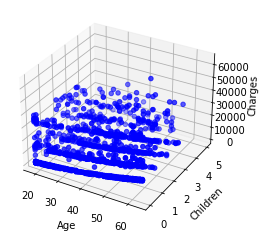

In [112]:
# Based on your results in the previouos cell Make a 3d scatter plot representing the data that you retain
# Select the columns of interest
age = df['age']
children = df['children']
charges = df['charges']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(age, children, charges, c='b', marker='o')

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('Children')
ax.set_zlabel('Charges')

# Show the plot
plt.show()

In [113]:
# Generates a new linear regression model with Y={charges} and the predictors you retained X1,2

X = df[['age', 'children']]
Y = df['charges']

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

new_model = sm.OLS(Y,X).fit()

print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     68.01
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           7.45e-29
Time:                        21:00:20   Log-Likelihood:                -14413.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1335   BIC:                         2.885e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2636.0417    968.630      2.721      0.0

In [118]:
# prediction: use the new model you trained to make predictions from the predictor values below. 
# Return the predicted charges.
df_new = pd.DataFrame({'age': [25, 35, 45, 50, 75],
                       'bmi': [20, 50, 34, 42, 23]})

# Define the independent variables (X) and the dependent variable (Y) for the new model
X = df[['age', 'children']]
Y = df['charges']
X = sm.add_constant(X)

new_model = sm.OLS(Y, X).fit()

# Define the predictor values for prediction
df_new = pd.DataFrame({'age': [25, 35, 45, 50, 75], 'children': [0, 1, 2, 3, 4]})
# Add a constant (intercept) to the predictor values
df_new = sm.add_constant(df_new)
# Use the new model to make predictions
predicted_charges = new_model.predict(df_new)

# Print the predicted charges
print("Predicted Charges:")
print(predicted_charges)


Predicted Charges:
0     9028.409556
1    12141.883790
2    15255.358024
3    17090.358696
4    24039.253619
dtype: float64


In [121]:
# Extract the Confidence and prediction intervals for apha= 0.05 of the b parameters for X1 and X2
# Extract confidence and prediction intervals for X1 and X2 with alpha = 0.05
confidence_interval = new_model.conf_int(alpha = 0.05)
prediction_interval = new_model.get_prediction().conf_int(alpha = 0.05)

# Filter intervals for X1 and X2
x1_intervals = confidence_interval.loc[['age', 'children']]
x2_intervals = confidence_interval.loc[['const']]

# Print confidence intervals for X1 and X2
print("Confidence Intervals for X1 (age) and X2 (children):\n")
print(x1_intervals)
print('\n\n')

# Print prediction intervals for X1 and X2
print("Prediction Intervals for X1 (age) and X2 (children):\n")
print(prediction_interval)

Confidence Intervals for X1 (age) and X2 (children):

                   0            1
age       211.568825   299.820600
children   42.241999  1070.812219



Prediction Intervals for X1 (age) and X2 (children):

[[ 6288.89526487  8699.5872955 ]
 [ 6673.66207933  8916.48527365]
 [10188.75104374 12741.39899581]
 ...
 [ 6001.05491727  8476.03821799]
 [ 6862.1760958   9149.0853148 ]
 [16940.67221882 19526.1661963 ]]
